In [ ]:
import tensorflow as tf 

#get dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
#normalization
x_train = x_train/255
x_test = x_test/255

In [ ]:
#neural net
neural_net = tf.keras.Sequential()
neural_net.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
neural_net.add(tf.keras.layers.Dense(16, activation='relu'))
neural_net.add(tf.keras.layers.Dense(16, activation='relu'))
neural_net.add(tf.keras.layers.Dense(10, activation='softmax'))

neural_net.summary()

In [4]:
#training
neural_net.compile('adam', loss='categorical_crossentropy', metrics = ['accuracy'])

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

model_history = neural_net.fit(x_train, y_train, validation_split=.2, batch_size=32, epochs=10)

2022-05-17 23:20:41.340923: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/10
1473/1500 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.8403

2022-05-17 23:20:54.482077: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37632000 exceeds 10% of free system memory.


1500/1500 [==============================] - 7s 2ms/step - loss: 0.5372 - accuracy: 0.8418 - val_loss: 0.2828 - val_accuracy: 0.9168
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2578 - accuracy: 0.9265 - val_loss: 0.2268 - val_accuracy: 0.9350
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2133 - accuracy: 0.9385 - val_loss: 0.1926 - val_accuracy: 0.9443
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1915 - accuracy: 0.9446 - val_loss: 0.1813 - val_accuracy: 0.9492
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1738 - accuracy: 0.9487 - val_loss: 0.1747 - val_accuracy: 0.9507
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1602 - accuracy: 0.9533 - val_loss: 0.1689 - val_accuracy: 0.9509
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1497 - accuracy: 0.9559 - val_loss: 0.1650 - val_accuracy: 0.9536
Epo

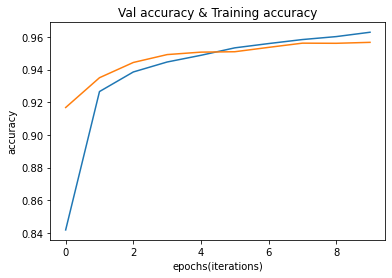

In [5]:
import matplotlib.pyplot as plt

#accuracy graph
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Val accuracy & Training accuracy')

plt.xlabel('epochs(iterations)')
plt.ylabel('accuracy')
plt.show()

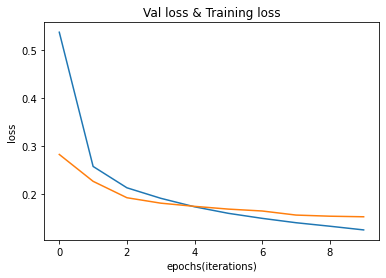

In [6]:
#loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Val loss & Training loss')

plt.xlabel('epochs(iterations)')
plt.ylabel('loss')
plt.show()

In [ ]:
predictions = neural_net.predict([x_test])

In [8]:
import random as rand
import numpy as np 

randomIndex = rand.randint(0, 10000)

print("predicted value is: ", np.argmax(predictions[randomIndex]))

predicted value is:  8


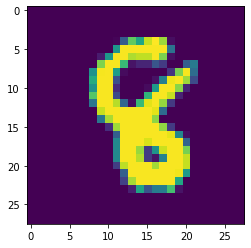

In [9]:
plt.imshow(x_test[randomIndex])
plt.show()

In [10]:
#images labeled as 6
six_indices = []

counter = 0

for i in range(x_test.shape[0]):
    if y_test[i][6] == 1:
        print(i)
        six_indices.append(i)
        counter +=1
    if counter ==10:
        break;

11
21
22
50
54
66
81
88
91
98


In [11]:
#images labeled as 9
nine_indices = []

counter = 0

for i in range(x_test.shape[0]):
    if y_test[i][9] == 1:
        print(i)
        nine_indices.append(i)
        counter +=1
    if counter ==10:
        break;

7
9
12
16
20
58
62
73
78
92


In [12]:
# Images labeled as 4
four_indices = []

counter = 0

for i in range(x_test.shape[0]):
    if y_test[i][4] == 1:
        print(i)
        four_indices.append(i)
        counter +=1
    if counter ==10:
        break;

4
6
19
24
27
33
42
48
49
56


In [13]:
len(six_indices)

10

In [14]:
len(four_indices)

10

In [15]:
len(nine_indices)

10

In [16]:
# Find 0 - 9 digits among all labeled as four
digit_to_count = {}
current_digit = 0

while current_digit < 10:
    count = 0
    for n in four_indices:
        if np.argmax(predictions[n]) == current_digit:
            count += 1

    digit_to_count[current_digit] = count
    
    current_digit += 1

print(digit_to_count)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 10, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


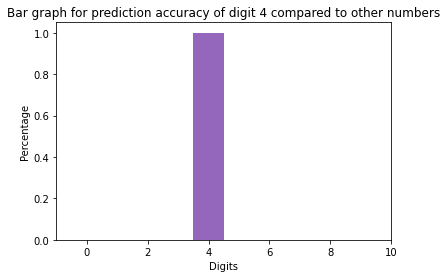

In [17]:
# Plot graph for predicting 4
plt.title("Bar graph for prediction accuracy of digit 4 compared to other numbers")
plt.ylabel('Percentage')
plt.xlabel('Digits')

for i in digit_to_count:
    plt.bar(i, digit_to_count[i]/len(four_indices), width=1.0)

In [18]:
# Find 0 - 9 digits among all labeled as six
digit_to_count = {}
current_digit = 0

while current_digit < 10:
    count = 0
    for n in six_indices:
        if np.argmax(predictions[n]) == current_digit:
            count += 1

    digit_to_count[current_digit] = count
    
    current_digit += 1

print(digit_to_count)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 10, 7: 0, 8: 0, 9: 0}


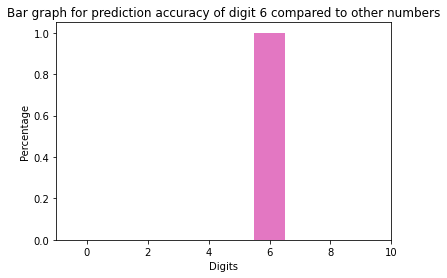

In [19]:
# Plot graph for predicting 6
plt.title("Bar graph for prediction accuracy of digit 6 compared to other numbers")
plt.ylabel('Percentage')
plt.xlabel('Digits')

for i in digit_to_count:
    plt.bar(i, digit_to_count[i]/len(six_indices), width=1.0)

In [20]:
# Find 0 - 9 digits among all labeled as nine
digit_to_count = {}
current_digit = 0

while current_digit < 10:
    count = 0
    for n in nine_indices:
        if np.argmax(predictions[n]) == current_digit:
            count += 1

    digit_to_count[current_digit] = count
    
    current_digit += 1

print(digit_to_count)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 10}


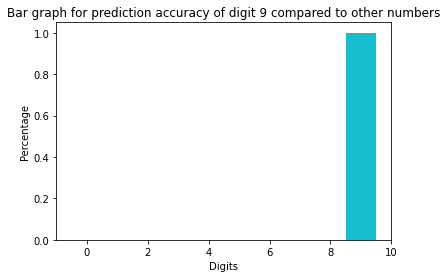

In [21]:
# Plot graph for predicting 9
plt.title("Bar graph for prediction accuracy of digit 9 compared to other numbers")
plt.ylabel('Percentage')
plt.xlabel('Digits')

for i in digit_to_count:
    plt.bar(i, digit_to_count[i]/len(nine_indices), width=1.0)